In [44]:
import sys
sys.path.append('..')
import numpy as np

Just in case importing surprise does not work

In [ ]:
!pip install surprise

In [2]:
from src.transform_data.input_books import BooksReader
from src.transform_data.input_interactions import InteractionsReader
from src.transform_data.rating import Rating
from src.transform_data.author_preparation import AuthorPreparation
from src.transform_data.books_authors import BookAuthors

In [56]:
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.model_selection.search import GridSearchCV

## ETL for books and interactions

In [4]:
books_df = BooksReader().get_data()

In [5]:
interactions_df = InteractionsReader().get_data()

In [6]:
interactions_df

,user_id,item_des,ratings
0,1,Agile Web Development with Rails: A Pragmatic ...,5
1,1,The Restaurant at the End of the Universe (Hit...,5
2,1,Siddhartha,5
3,1,The Clock of the Long Now: Time and Responsibi...,4
4,1,"Ready Player One (Ready Player One, #1)",4
...,...,...,...
127673,10978,The Foundation: A Great American Secret: How P...,3
127674,10986,Cosette: The Sequel to Les Miserables,4
127675,10986,J. D. Salinger's The Catcher in the Rye,5
127676,10988,Facing the Lion: Growing Up Maasai on the Afri...,3


## Exploratory Data Analysis

In [7]:
books_df

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,...,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652.0,4:556485,total:2298124,16,9,Scholastic Inc.,28062,...,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870.0,4:604283,total:2358637,1,9,Scholastic Inc.,29770,...,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309.0,4:1513191,total:6587388,1,11,Scholastic Inc,75911,...,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352.0,4:706082,total:2560657,1,11,Scholastic,244,...,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435.0,4:630534,total:2610317,1,5,Scholastic Inc.,37093,...,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256590,3724824,Assessment Case Studies: Common Issues in Impl...,1:0,NaN,4:0,total:0,1,1,Agathon Press,0,...,NaN,James O. Nichols,0.00,2:0,5:0,0875861121,3:0,NaN,NaN,212.0
256591,3724826,Order In The Twilight,1:0,NaN,4:1,total:1,12,31,Ohio University Press,0,...,NaN,Bernhard Waldenfels,4.00,2:0,5:0,0821411683,3:0,<i>“Whoever distrusts the barking of watchdogs...,NaN,181.0
256592,3724827,Rodale's Complete Home Products Manual: The Be...,1:0,NaN,4:0,total:0,12,31,Rodale Press,0,...,NaN,Rodale Press,0.00,2:0,5:0,0878577971,3:0,NaN,NaN,354.0
256593,3724833,Doing Business in Arizona: A Legal Guide,1:0,NaN,4:0,total:0,3,1,University of Arizona Press,0,...,NaN,Snell & Wilmer Associates,0.00,2:0,5:0,0816518890,3:0,<b><i>Doing Business in Arizona</i> brings tog...,NaN,330.0


### Basic counts

In [8]:
print(f'# books in books dataset {books_df.Name.nunique()}')
print(f'# authors in books dataset {books_df.Authors.nunique()}')
print(f'# authors in books dataset {books_df.Authors.nunique()}')

print(f'# books in interactions dataset {interactions_df.item_des.nunique()}')
print(f'# users in interactions dataset {interactions_df.user_id.nunique()}')
print(f'Unique ratings in interactions dataset {interactions_df.ratings.unique()}')
print(f'# ratings that are not zero {interactions_df[interactions_df.ratings!=0].count().iloc[0]}')


# books in books dataset 1390912
# authors in books dataset 572126
# authors in books dataset 572126
# books in interactions dataset 103533
# users in interactions dataset 8919
Unique ratings in interactions dataset [5 4 3 1 2 0]
# ratings that are not zero 357831


In [9]:
interactions_df = interactions_df[interactions_df.ratings!=0]

### Plots

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

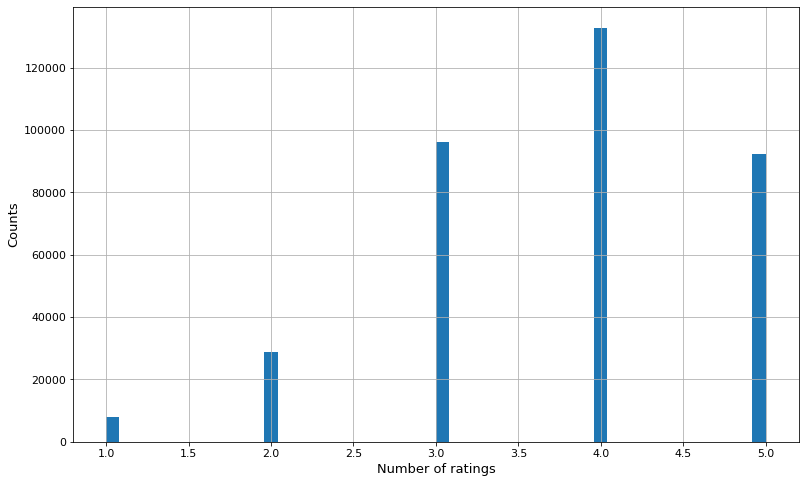

In [10]:
import matplotlib.pyplot as plt
interactions_df.ratings.hist(bins=50, figsize=(13, 8))
plt.xlabel('Number of ratings', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

[]

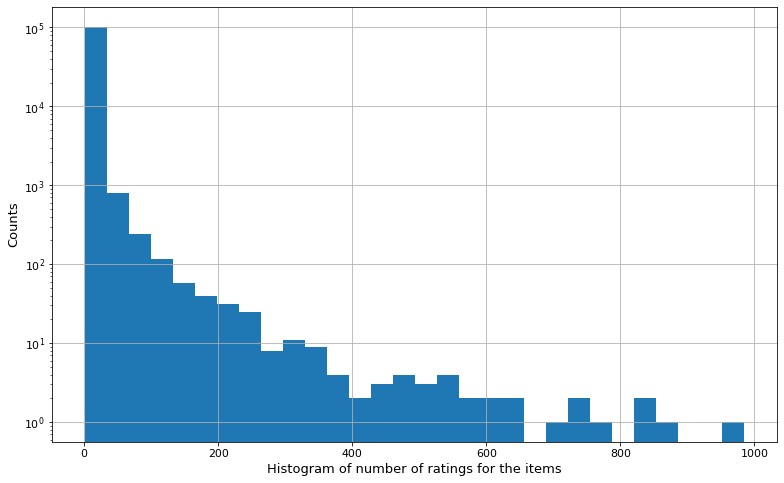

In [11]:
interactions_df.groupby('item_des').count()['ratings'].hist(bins=30, figsize=(13, 8))
plt.xlabel('Histogram of number of ratings for the items', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()

We can see that we have a lot of books with only one or two ratings. In normal circumstances, I would filter these books. However, the little amount of data prevents me from discarding this and I am going to keep this data due to the amount of data.

[]

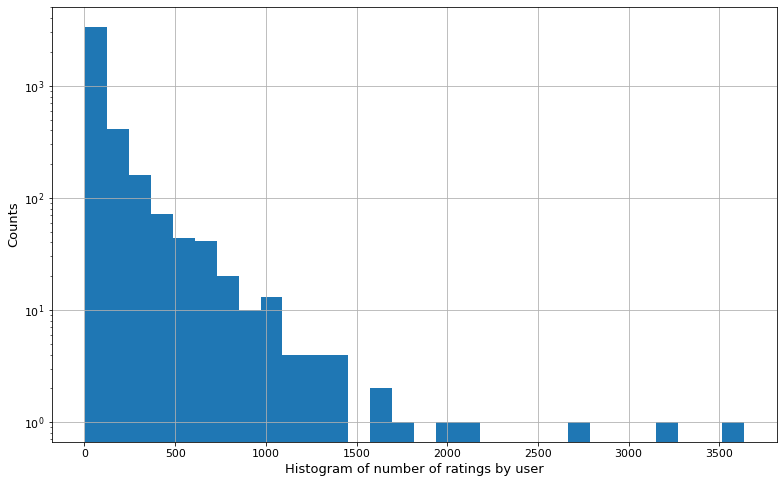

In [12]:
interactions_df.groupby('user_id').count()['ratings'].hist(bins=30, figsize=(13, 8))
plt.xlabel('Histogram of number of ratings by user', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()

Here, the effect exists again. However, it seems not to be as sharp as the previous one, since we have only 4100 users and around 300K ratings.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

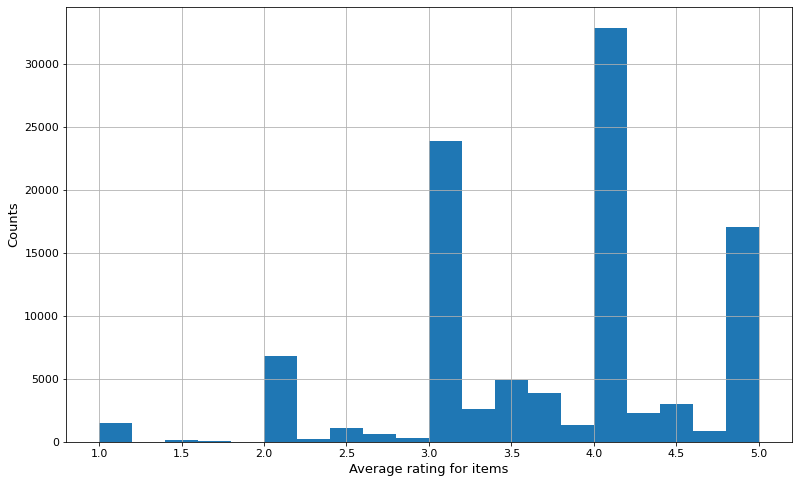

In [13]:
interactions_df.groupby('item_des').mean()['ratings'].hist(bins=20, figsize=(13, 8))
plt.xlabel('Average rating for items', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

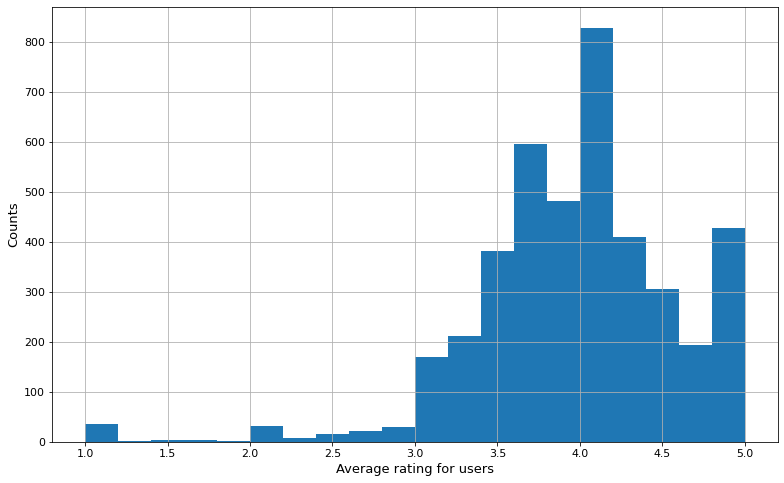

In [14]:
interactions_df.groupby('user_id').mean()['ratings'].hist(bins=20, figsize=(13, 8))
plt.xlabel('Average rating for users', size=13)
plt.ylabel('Counts', size=13)
plt.xticks(size=11)
plt.yticks(size=11)

It seems that most of the users really like what they read and rate. This could be a bias if people do not rate books that they do not like, but we cannot know this for sure.


## Models

### Examples for first approach

#### Example for Algorithm 1. Matrix Factorization

A matrix factorization is a way of reducing a matrix into its constituent parts. It is an approach that can simplify more complex matrix operations that can be performed on the decomposed matrix rather than on the original matrix itself. More details in project document

In [15]:
dataset_surprise_alg_1 = Rating(interactions_df).get_surprise_dataset()


In [30]:
svd = SVD(n_factors=3, n_epochs=15)

In [31]:
cross_validation = cross_validate(svd, dataset_surprise_alg_1, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8838  0.8827  0.8845  0.8826  0.8817  0.8830  0.0010  
MAE (testset)     0.7012  0.7009  0.7022  0.7015  0.7022  0.7016  0.0005  
Fit time          12.16   9.01    10.54   12.26   10.79   10.95   1.19    
Test time         1.97    3.23    1.15    2.66    1.18    2.04    0.82    


In [32]:
cross_validation

{'test_rmse': array([0.88375369, 0.88272823, 0.88449496, 0.88256576, 0.88169313]),
 'test_mae': array([0.70122713, 0.70089963, 0.70219561, 0.70151885, 0.70215305]),
 'fit_time': (12.164776802062988,
  9.014293193817139,
  10.537081241607666,
  12.26034426689148,
  10.792004346847534),
 'test_time': (1.9659528732299805,
  3.2344539165496826,
  1.1461772918701172,
  2.6629321575164795,
  1.177682876586914)}

#### Example for Algorithm 2. Combined matrix with Matrix Factorization

For this algorithm, We want to introduce bias for A adding the author information. The way to do this is in the project document

In [17]:
interactions_df

,user_id,item_des,ratings
0,1,Agile Web Development with Rails: A Pragmatic ...,5
1,1,The Restaurant at the End of the Universe (Hit...,5
2,1,Siddhartha,5
3,1,The Clock of the Long Now: Time and Responsibi...,4
4,1,"Ready Player One (Ready Player One, #1)",4
...,...,...,...
127673,10978,The Foundation: A Great American Secret: How P...,3
127674,10986,Cosette: The Sequel to Les Miserables,4
127675,10986,J. D. Salinger's The Catcher in the Rye,5
127676,10988,Facing the Lion: Growing Up Maasai on the Afri...,3


In [19]:
df_join = (AuthorPreparation(alpha=0.2, col_author='Author', 
                            df_interactions=interactions_df, 
                            df_books=books_df.drop_duplicates())
           .put_author_bias()
          )



In [20]:
dataset_surprise_alg_2 = Rating(df_join).get_surprise_dataset()

In [33]:
algo = SVD(n_factors=n_factors, n_epochs=grid['n_epochs'][0], random_state=1)
kf = KFold(n_splits=5, random_state=1)
rmse_list = []
for uad, uar in zip(kf.split(user_authors_dat), kf.split(user_authors_real)):
    trainset, _ = uad
    _, testset = uar
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse_list.append(accuracy.rmse(predictions))

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7605  0.7630  0.7653  0.7621  0.7627  0.7627  0.0016  
Fit time          6.94    7.11    16.90   12.06   10.22   10.65   3.67    
Test time         1.26    1.25    2.60    3.59    2.07    2.15    0.88    


In [34]:
rmse_list

{'test_rmse': array([0.76045192, 0.76304783, 0.76530042, 0.76206773, 0.76272742]),
 'fit_time': (6.94477391242981,
  7.114300966262817,
  16.90139079093933,
  12.057157516479492,
  10.22018575668335),
 'test_time': (1.2576217651367188,
  1.247187852859497,
  2.6031172275543213,
  3.5924482345581055,
  2.0741100311279297)}

### Model benchmark. Tuning parameters

#### Algorithm 1. Matrix Factorization

In [40]:
grid = {'n_factors': [1,2,3,5,7,10], 'n_epochs': [15]}
gs = GridSearchCV(SVD, grid, cv=5, n_jobs=-1)
gs.fit(dataset_surprise_alg_1)

In [41]:
gs.cv_results

{'split0_test_rmse': array([0.8835046 , 0.88365805, 0.88347475, 0.88365889, 0.88378668,
        0.88435486]),
 'split1_test_rmse': array([0.88305391, 0.88298006, 0.88320357, 0.88323376, 0.88325798,
        0.88352753]),
 'split2_test_rmse': array([0.8804676 , 0.88039171, 0.88075257, 0.88039203, 0.8803809 ,
        0.88122353]),
 'split3_test_rmse': array([0.88095789, 0.88105495, 0.8811352 , 0.88087403, 0.88149831,
        0.88139545]),
 'split4_test_rmse': array([0.88346305, 0.8832614 , 0.88373296, 0.88366728, 0.88354253,
        0.88390492]),
 'mean_test_rmse': array([0.88228941, 0.88226923, 0.88245981, 0.8823652 , 0.88249328,
        0.88288126]),
 'std_test_rmse': array([0.00130618, 0.00129754, 0.00125487, 0.00143112, 0.00132746,
        0.00131093]),
 'rank_test_rmse': array([2, 1, 4, 3, 5, 6], dtype=int64),
 'split0_test_mae': array([0.70144186, 0.70155684, 0.70141662, 0.70152806, 0.70172387,
        0.70211536]),
 'split1_test_mae': array([0.70241239, 0.70232611, 0.70245224, 0.70

In [42]:
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8822692326873167
{'n_factors': 2, 'n_epochs': 15}


Text(0, 0.5, 'RMSE')

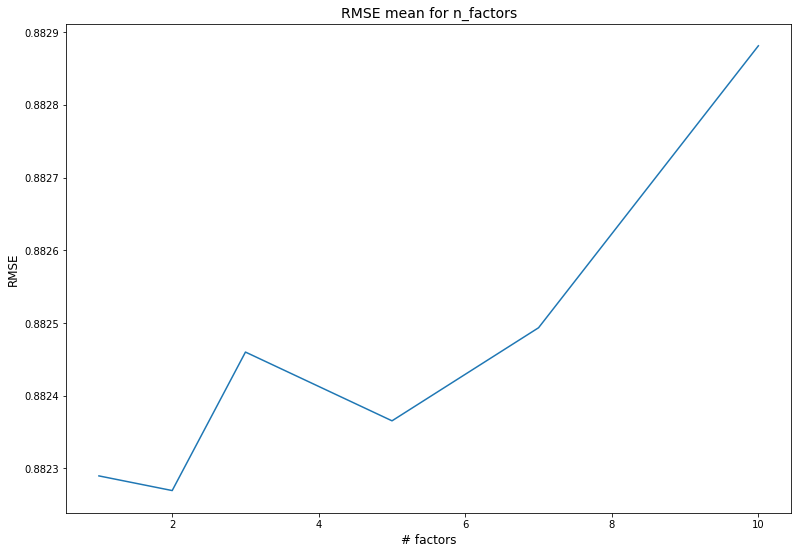

In [89]:
plt.figure(figsize=(13,9))
plt.plot([1,2,3,5,7,10],gs.cv_results['mean_test_rmse'])
plt.title('RMSE mean for n_factors', size=14)
plt.xlabel('# factors', size=12)
plt.ylabel('RMSE', size=12)

#### Algorithm 2. Matrix Factorization

In [57]:
%%time

alphas_grid = np.linspace(0.25,1,4)
print(alphas_grid)
dict_gs = {}
dict_best_params = {}
for al in alphas_grid:
    df_join = (AuthorPreparation(alpha=al, col_author='Author', 
                            df_interactions=interactions_df, 
                            df_books=books_df.drop_duplicates())
           .put_author_bias()
          )
    dataset_surprise_alg_2 = Rating(df_join).get_surprise_dataset()
    grid = {'n_factors': [1,2,3,5,7], 'n_epochs': [15]}
    dict_gs[al] = {}
    for n_factors in grid['n_factors']:
        algo = SVD(n_factors=n_factors, n_epochs=grid['n_epochs'][0], random_state=1)
        kf = KFold(n_splits=5, random_state=1)
        rmse_list = []
        for uad, uar in zip(kf.split(dataset_surprise_alg_2), kf.split(dataset_surprise_alg_1)):
            trainset, _ = uad
            _, testset = uar
            algo.fit(trainset)
            predictions = algo.test(testset)
            rmse_list.append(accuracy.rmse(predictions))

        
        dict_gs[al][n_factors] = {'mean': np.mean(rmse_list), 'std': np.std(rmse_list)}
        print(f'Done for # factors : {n_factors}')
    print(f'Done for alpha : {al}')



[0.25 0.5  0.75 1.  ]
RMSE: 0.8849
RMSE: 0.8790
RMSE: 0.8773
RMSE: 0.8817
RMSE: 0.8785
Done for # factors : 1
RMSE: 0.8849
RMSE: 0.8792
RMSE: 0.8775
RMSE: 0.8819
RMSE: 0.8786
Done for # factors : 2
RMSE: 0.8850
RMSE: 0.8791
RMSE: 0.8774
RMSE: 0.8818
RMSE: 0.8786
Done for # factors : 3
RMSE: 0.8852
RMSE: 0.8791
RMSE: 0.8776
RMSE: 0.8818
RMSE: 0.8787
Done for # factors : 5
RMSE: 0.8851
RMSE: 0.8791
RMSE: 0.8775
RMSE: 0.8820
RMSE: 0.8789
Done for # factors : 7
Done for alpha : 0.25
RMSE: 0.8875
RMSE: 0.8815
RMSE: 0.8801
RMSE: 0.8847
RMSE: 0.8811
Done for # factors : 1
RMSE: 0.8874
RMSE: 0.8817
RMSE: 0.8802
RMSE: 0.8849
RMSE: 0.8812
Done for # factors : 2
RMSE: 0.8875
RMSE: 0.8816
RMSE: 0.8802
RMSE: 0.8848
RMSE: 0.8812
Done for # factors : 3
RMSE: 0.8877
RMSE: 0.8816
RMSE: 0.8803
RMSE: 0.8848
RMSE: 0.8813
Done for # factors : 5
RMSE: 0.8876
RMSE: 0.8817
RMSE: 0.8803
RMSE: 0.8850
RMSE: 0.8814
Done for # factors : 7
Done for alpha : 0.5
RMSE: 0.8948
RMSE: 0.8889
RMSE: 0.8878
RMSE: 0.8926
RMS

In [61]:
    
dict_gs[0] = gs.cv_results
dict_best_params[0] = gs.best_params['rmse']

### Get best parameters results

Build a table with alpha, n_factors y RMSE

In [62]:
dict_gs[0.0] = {f:{'mean': dict_gs[0]['mean_test_rmse'][i], 
                   'std': dict_gs[0]['std_test_rmse'][i]}  
                for i, f in enumerate([1, 2, 3, 5, 7])}


In [97]:
dict_gs_m = {str(alpha)+'_'+str(n_f): dict_gs[alpha][n_f]['mean'] for n_f in [1, 2, 3, 5, 7] for alpha in [0,0.25,0.5,0.75,1]}

In [101]:
dict_gs_m

{'0_1': 0.882289409536089,
 '0.25_1': 0.8803105761320873,
 '0.5_1': 0.8830047397243093,
 '0.75_1': 0.8905446210758541,
 '1_1': 0.9028184823716003,
 '0_2': 0.8822692326873167,
 '0.25_2': 0.8804272806901556,
 '0.5_2': 0.8830849303771806,
 '0.75_2': 0.8906031282775333,
 '1_2': 0.9028651873848134,
 '0_3': 0.8824598104238003,
 '0.25_3': 0.8803772319812669,
 '0.5_3': 0.88307464929994,
 '0.75_3': 0.8906168121406713,
 '1_3': 0.9028948637588666,
 '0_5': 0.8823651970760737,
 '0.25_5': 0.8804676043456444,
 '0.5_5': 0.8831559422349299,
 '0.75_5': 0.8906896270978762,
 '1_5': 0.9029632464933585,
 '0_7': 0.8824932791489692,
 '0.25_7': 0.8805261706414264,
 '0.5_7': 0.8831867968754101,
 '0.75_7': 0.8907036067375824,
 '1_7': 0.9029664417046863}

In [119]:
import pandas as pd
df_df = pd.DataFrame.from_dict(dict_gs_m, orient='index')

In [120]:
df_df = df_df.reset_index()
df_df['alpha'] = df_df['index'].apply(lambda x: x.split('_')[0])
df_df['n_factors'] = df_df['index'].apply(lambda x: x.split('_')[1])
df_df.drop('index', axis=1, inplace=True)

In [126]:
df_df.columns = ['RMSE', 'alpha', 'n_factors']

In [144]:
df_df.pivot(columns='alpha', index='n_factors', values='RMSE')

alpha,0,0.25,0.5,0.75,1
n_factors,,,,,
1,0.882289,0.880311,0.883005,0.890545,0.902818
2,0.882269,0.880427,0.883085,0.890603,0.902865
3,0.882460,0.880377,0.883075,0.890617,0.902895
5,0.882365,0.880468,0.883156,0.890690,0.902963
7,0.882493,0.880526,0.883187,0.890704,0.902966


In [123]:
import seaborn as sns

<AxesSubplot:xlabel='alpha', ylabel='n_factors'>

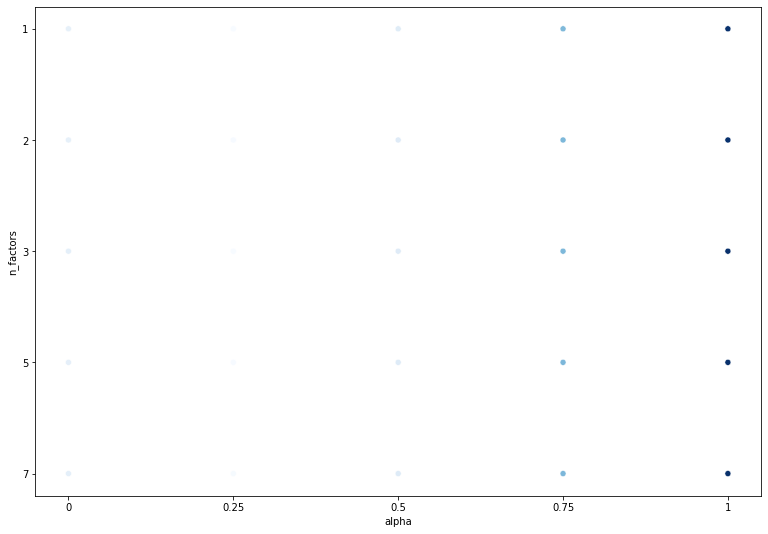

In [141]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=df_df, hue='RMSE', x='alpha', y='n_factors', palette='Blues', legend=False)

## Convert to a Sagemaker Estimator

In [145]:
from sagemaker.sklearn.estimator import SKLearn
import sagemaker
bucket = 'recommendation-books-data'
prefix = 'model'
output_path = 's3://{}/{}'.format(bucket, prefix)
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()
# instantiate a pytorch estimator
estimator = SKLearn(entry_point='train.py',
                    source_dir='../src/sklearn_estimator/',
                    role=role,
                    py_version='py3',
                    framework_version= '0.23-1',
                    train_instance_count=1,
                    train_instance_type='ml.c4.xlarge',
                    output_path=output_path,
                    sagemaker_session=sagemaker_session,
                    hyperparameters={
                        'epochs': 15,
                        'alpha': 0.2,
                        'n_factors': 3,
                        'model-dir': '../model'
                    }
                    )


ModuleNotFoundError: No module named 'sagemaker'